In [2]:
import pandas as pd
import pylab as pl
import numpy as np
import scipy.optimize as opt
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
%matplotlib inline 
import matplotlib.pyplot as plt

It is my hypothesis that taking pictures with the face on different marked difference in point values for each points x,y,z.

To test this hypothesis I will look at the values from similar faces and see if there is a marked difference on how it is being taken in

In [3]:
faces = {}
for i in range(7):
    faces['f{}'.format(i+1)] = pd.read_csv('csvs/f{}.csv'.format(i+1))

Faces f1 and f2 are very similar. I'm going to compare the values of f1 and f2

In [13]:
dif_1_2 = faces['f1'] - faces['f5']

In [9]:
faces["f1"].min(axis = 1)


0   -0.045525
dtype: float64

In [14]:
dif_1_2

,x0,y0,z0,x1,y1,z1,x2,y2,z2,x3,...,z464,x465,y465,z465,x466,y466,z466,x467,y467,z467
0,0.206661,0.094824,0.009159,0.226902,0.092032,0.00439,0.219155,0.090686,0.004948,0.244408,...,-0.006651,0.255449,0.090444,-0.006493,0.262332,0.136267,-0.005641,0.264935,0.141048,-0.005836


In [15]:
dif_1_2.min(axis=1)

0   -0.051491
dtype: float64

In [16]:
dif_1_2.max(axis=1)

0    0.307411
dtype: float64

Okay so thats not really the case that the positioning is the problem so taking the deltas is going to help 

Maybe there is too much info and its clouding the necessary information. The most common pieces to move are going to be the lips lower nose  

In [20]:
eyebrows = [336,296,334,293,300,276,283,282,295, 285, 107,66,105, 63, 70, 55, 65, 52, 53,46 ]

In [21]:
eyes = [157,173,133,155,154,156,145,144,163,17,133,246,161,160,159,158,384,385,386,387,388,466,263,249,390,373,374,380,381,382,362,398]

In [22]:
nose = [326,328,290,305,460,455,392,439,294,278,331,279,360,363,231,5,51,134,131,49,102,64,235,240,29,75,60,99,97,166,219,48,115,218,79,239,238,20,242,141,241,237,220,45,44,125,141,94,19,1,4,275,440,344,274,354,370,162,461,457,438,309,250,462]

In [23]:
lips = [0,27,39,40,185,61,146,91,181,84,17,314,405,321,375,291,409,270,269,267,11,72,374,184,76,77,90,180,85,16,315,404,320,307,306,408,304,303,302,12,38,41,42,183,62,96,89,179,86,15,316,403,319,325,292,407,272,271,268,13,82,81,80,191,78,95,88,178,87,14,317,402,318,324,308,415,310,311,312]

In [24]:
def create_df(state, filename):
    df = pd.read_csv(filename)
    df['state'] = state
    return df
        

In [25]:
smiles = ['smile_close.csv', 'smile_1.csv', 'smile_2.csv']
neutrals = ['n_close.csv', 'neutral_1.csv', 'neutral_2.csv']
frowns = ['f_close.csv', 'frown_1.csv', 'frown_2.csv']

In [26]:
stated_dfs = []
for smile in smiles:
    stated_dfs.append(create_df(1, "csvs/old/{}".format(smile)))
    

for neutral in neutrals:
    stated_dfs.append(create_df(0, "csvs/old/{}".format(neutral)))
    
for frown in neutrals:
    stated_dfs.append(create_df(2,"csvs/old/{}".format(frown)))


In [27]:
all_df = pd.concat(stated_dfs)

In [28]:
all_df


,x0,y0,z0,x1,y1,z1,x2,y2,z2,x3,...,x465,y465,z465,x466,y466,z466,x467,y467,z467,state
0,0.545830,0.524056,-0.029297,0.546287,0.479100,-0.064522,0.546125,0.492963,-0.034046,0.537084,...,0.566337,0.386870,-0.013140,0.630449,0.373922,0.008083,0.636708,0.368261,0.008427,1
1,0.540818,0.531962,-0.026713,0.542528,0.493206,-0.062420,0.542411,0.504984,-0.032203,0.535252,...,0.566137,0.395106,-0.013939,0.630803,0.378139,0.006460,0.637314,0.372235,0.006693,1
2,0.540650,0.533919,-0.027271,0.542201,0.496070,-0.062895,0.542208,0.507744,-0.032877,0.535400,...,0.566600,0.398998,-0.012992,0.631385,0.383161,0.007961,0.638079,0.377253,0.008266,1
3,0.542104,0.531385,-0.029489,0.543360,0.492483,-0.064428,0.543156,0.505391,-0.034443,0.536507,...,0.567261,0.400789,-0.012429,0.631759,0.387164,0.009009,0.638496,0.381668,0.009402,1
4,0.542159,0.530128,-0.030081,0.543637,0.492219,-0.064291,0.543250,0.505279,-0.034784,0.536629,...,0.566863,0.401099,-0.011296,0.630695,0.388394,0.010466,0.637466,0.382900,0.010949,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
300,0.332101,0.581086,-0.023710,0.332553,0.540172,-0.048900,0.333776,0.552849,-0.024820,0.328942,...,0.358886,0.467826,-0.010526,0.414022,0.465984,0.000819,0.420345,0.459369,0.000769,2
301,0.333274,0.580750,-0.023552,0.333457,0.540038,-0.048730,0.334656,0.552703,-0.024737,0.329312,...,0.358366,0.467382,-0.010422,0.412534,0.464773,0.000994,0.418703,0.458589,0.000935,2
302,0.332594,0.580024,-0.023589,0.332583,0.539112,-0.048834,0.333912,0.551659,-0.024748,0.328571,...,0.357727,0.465778,-0.010463,0.411829,0.462457,0.000804,0.417968,0.456558,0.000696,2
303,0.332375,0.579395,-0.023878,0.332176,0.538839,-0.048864,0.333723,0.551176,-0.024882,0.328200,...,0.357621,0.464614,-0.010217,0.411815,0.460955,0.000487,0.417957,0.455044,0.000317,2


In [61]:
imp_face_pts = eyes+ eyebrows + nose +lips
len(imp_face_pts)

195

In [30]:
imp_headers = []
for point in imp_face_pts:
    imp_headers.append("x{}".format(point))
    imp_headers.append("y{}".format(point))
    imp_headers.append("z{}".format(point))
    
imp_headers    

['x157',
 'y157',
 'z157',
 'x173',
 'y173',
 'z173',
 'x133',
 'y133',
 'z133',
 'x155',
 'y155',
 'z155',
 'x154',
 'y154',
 'z154',
 'x156',
 'y156',
 'z156',
 'x145',
 'y145',
 'z145',
 'x144',
 'y144',
 'z144',
 'x163',
 'y163',
 'z163',
 'x17',
 'y17',
 'z17',
 'x133',
 'y133',
 'z133',
 'x246',
 'y246',
 'z246',
 'x161',
 'y161',
 'z161',
 'x160',
 'y160',
 'z160',
 'x159',
 'y159',
 'z159',
 'x158',
 'y158',
 'z158',
 'x384',
 'y384',
 'z384',
 'x385',
 'y385',
 'z385',
 'x386',
 'y386',
 'z386',
 'x387',
 'y387',
 'z387',
 'x388',
 'y388',
 'z388',
 'x466',
 'y466',
 'z466',
 'x263',
 'y263',
 'z263',
 'x249',
 'y249',
 'z249',
 'x390',
 'y390',
 'z390',
 'x373',
 'y373',
 'z373',
 'x374',
 'y374',
 'z374',
 'x380',
 'y380',
 'z380',
 'x381',
 'y381',
 'z381',
 'x382',
 'y382',
 'z382',
 'x362',
 'y362',
 'z362',
 'x398',
 'y398',
 'z398',
 'x336',
 'y336',
 'z336',
 'x296',
 'y296',
 'z296',
 'x334',
 'y334',
 'z334',
 'x293',
 'y293',
 'z293',
 'x300',
 'y300',
 'z300',
 'x2

In [31]:
imp_headers.append('state')

In [33]:
imp_df = all_df[imp_headers]
imp_df

,x157,y157,z157,x173,y173,z173,x133,y133,z133,x155,...,x310,y310,z310,x311,y311,z311,x312,y312,z312,state
0,0.503490,0.367988,0.000131,0.510340,0.374456,0.002529,0.513538,0.378846,0.004331,0.511210,...,0.581244,0.534766,-0.004384,0.572018,0.535427,-0.012133,0.560432,0.536531,-0.017859,1
1,0.504230,0.374258,-0.001541,0.511073,0.382270,0.000975,0.514230,0.387121,0.002765,0.512017,...,0.576372,0.540388,-0.002891,0.567036,0.541574,-0.010223,0.555253,0.543185,-0.015648,1
2,0.504981,0.378635,-0.000470,0.511808,0.386436,0.002062,0.514933,0.391211,0.003823,0.512676,...,0.577501,0.541744,-0.003373,0.567739,0.542949,-0.010753,0.555542,0.544596,-0.016268,1
3,0.505284,0.382021,0.000990,0.511985,0.389247,0.003386,0.515006,0.393839,0.005056,0.512634,...,0.580665,0.539827,-0.004740,0.570375,0.540833,-0.012798,0.557728,0.542431,-0.018737,1
4,0.504928,0.382305,0.001806,0.511670,0.389745,0.004187,0.514716,0.394416,0.005825,0.512313,...,0.580690,0.538506,-0.005472,0.570416,0.539380,-0.013572,0.557738,0.540899,-0.019596,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
300,0.309193,0.454159,0.004431,0.314040,0.456873,0.006459,0.316158,0.459235,0.007760,0.314006,...,0.356754,0.595347,-0.008932,0.349609,0.594772,-0.012247,0.341305,0.594462,-0.014528,2
301,0.308937,0.453877,0.004504,0.313837,0.456818,0.006495,0.315996,0.459295,0.007791,0.313842,...,0.357976,0.594295,-0.008708,0.350843,0.593852,-0.012106,0.342567,0.593684,-0.014460,2
302,0.308739,0.452091,0.004836,0.313571,0.454985,0.006767,0.315709,0.457429,0.008062,0.313637,...,0.357198,0.593690,-0.008805,0.350134,0.593247,-0.012146,0.341897,0.593047,-0.014472,2
303,0.308791,0.451265,0.005861,0.313614,0.453958,0.007721,0.315756,0.456284,0.008961,0.313736,...,0.357064,0.593051,-0.009528,0.350018,0.592577,-0.012721,0.341742,0.592366,-0.014933,2


In [36]:
imp_df['state'] = imp_df['state'].astype('int')
y = np.asarray(imp_df['state'])
y [0:5]

c:\users\kaitlin\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


array([1, 1, 1, 1, 1])

In [37]:
just_x_df = imp_df.drop('state', axis = 1)
just_x_df.head()

,x157,y157,z157,x173,y173,z173,x133,y133,z133,x155,...,z415,x310,y310,z310,x311,y311,z311,x312,y312,z312
0,0.503490,0.367988,0.000131,0.510340,0.374456,0.002529,0.513538,0.378846,0.004331,0.511210,...,0.004785,0.581244,0.534766,-0.004384,0.572018,0.535427,-0.012133,0.560432,0.536531,-0.017859
1,0.504230,0.374258,-0.001541,0.511073,0.382270,0.000975,0.514230,0.387121,0.002765,0.512017,...,0.005867,0.576372,0.540388,-0.002891,0.567036,0.541574,-0.010223,0.555253,0.543185,-0.015648
2,0.504981,0.378635,-0.000470,0.511808,0.386436,0.002062,0.514933,0.391211,0.003823,0.512676,...,0.005358,0.577501,0.541744,-0.003373,0.567739,0.542949,-0.010753,0.555542,0.544596,-0.016268
3,0.505284,0.382021,0.000990,0.511985,0.389247,0.003386,0.515006,0.393839,0.005056,0.512634,...,0.004743,0.580665,0.539827,-0.004740,0.570375,0.540833,-0.012798,0.557728,0.542431,-0.018737
4,0.504928,0.382305,0.001806,0.511670,0.389745,0.004187,0.514716,0.394416,0.005825,0.512313,...,0.004036,0.580690,0.538506,-0.005472,0.570416,0.539380,-0.013572,0.557738,0.540899,-0.019596


In [38]:
X = np.asarray(just_x_df)
X[0:5]

array([[ 5.03489971e-01,  3.67988318e-01,  1.31256078e-04, ...,
         5.60432315e-01,  5.36531448e-01, -1.78585686e-02],
       [ 5.04230022e-01,  3.74258101e-01, -1.54102477e-03, ...,
         5.55252671e-01,  5.43185294e-01, -1.56478342e-02],
       [ 5.04980683e-01,  3.78635108e-01, -4.69918596e-04, ...,
         5.55541754e-01,  5.44595778e-01, -1.62684228e-02],
       [ 5.05284429e-01,  3.82021189e-01,  9.90154105e-04, ...,
         5.57727814e-01,  5.42431414e-01, -1.87374633e-02],
       [ 5.04928231e-01,  3.82305384e-01,  1.80617115e-03, ...,
         5.57738364e-01,  5.40898561e-01, -1.95963122e-02]])

In [39]:
from sklearn.pipeline import make_pipeline 
from sklearn.preprocessing import StandardScaler 

from sklearn.linear_model import LogisticRegression, RidgeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score # Accuracy metrics 
from sklearn.metrics import classification_report, confusion_matrix
import itertools

In [42]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [43]:
from sklearn.model_selection import RepeatedKFold 
kf = RepeatedKFold(n_splits=5, n_repeats=10, random_state=None) 
pipelines = {
    'lr':make_pipeline(StandardScaler(), LogisticRegression()),
    'rc':make_pipeline(StandardScaler(), RidgeClassifier()),
    'rf':make_pipeline(StandardScaler(), RandomForestClassifier()),
    'gb':make_pipeline(StandardScaler(), GradientBoostingClassifier()),
}
fit_models = {}

In [44]:
fit_models


{}

In [45]:
gb_train = {}
gb_train['pipeline'] = pipelines['gb']

In [46]:
for train_index, test_index in kf.split(X):
    print("Train:", train_index, "Validation:",test_index)
    X_train, X_test = X[train_index], X[test_index] 
    y_train, y_test = y[train_index], y[test_index]
    for algo, pipeline in gb_train.items():
        model = pipeline.fit(X_train, y_train)
        fit_models[algo] = model

Train: [   0    2    3 ... 2714 2716 2717] Validation: [   1    8   11   21   24   25   39   42   46   48   59   61   62   70
   74   86   87   88   91   93   95   98  103  104  106  107  109  120
  124  131  133  149  153  154  160  168  169  173  177  179  184  189
  190  196  212  216  219  221  222  223  229  244  255  265  266  269
  270  271  276  281  282  283  284  298  301  302  304  305  306  307
  317  330  339  343  353  358  359  376  378  380  386  389  415  422
  426  429  430  436  442  444  445  451  454  456  458  461  463  467
  469  470  474  475  484  486  495  496  501  502  503  513  515  516
  532  533  536  542  544  554  565  576  577  583  587  589  591  593
  595  599  603  608  614  616  623  624  626  638  640  649  650  656
  657  672  677  681  687  689  693  695  701  702  706  707  714  717
  720  738  753  755  760  765  768  770  772  781  800  801  802  805
  806  814  818  819  833  834  847  851  853  854  863  865  869  870
  872  876  877  882  

Train: [   0    1    2 ... 2715 2716 2718] Validation: [   7   12   26   28   29   30   31   35   36   38   40   50   67   68
   75   92   97  111  116  118  122  125  128  130  135  141  151  158
  165  166  167  174  192  197  213  217  218  225  227  231  238  239
  242  250  252  258  259  275  285  289  291  299  309  316  319  322
  332  333  334  337  338  340  342  345  351  354  356  369  371  375
  396  406  407  410  411  414  416  417  418  419  421  449  460  466
  476  481  487  488  492  511  519  520  522  527  535  543  548  558
  560  572  574  575  588  594  600  606  607  609  631  635  641  643
  645  646  652  653  655  659  666  669  676  679  683  685  690  703
  713  716  721  723  725  729  734  741  744  746  752  757  776  778
  779  789  791  795  796  797  798  804  808  813  817  821  822  824
  825  827  837  840  843  846  849  852  859  860  861  864  866  868
  883  885  893  905  907  910  913  922  927  929  954  959  962  963
  965  984  991  993 1

Train: [   0    1    2 ... 2715 2716 2717] Validation: [   3   25   29   32   33   35   36   44   59   69   71   72   76   79
   84   86   87   90   93  105  106  108  113  115  121  122  124  128
  131  133  140  148  150  154  166  170  173  184  185  188  199  200
  203  206  215  217  220  227  231  233  243  249  255  257  262  264
  273  278  285  294  301  312  319  324  328  329  334  338  343  346
  347  349  359  370  377  386  393  394  400  403  406  424  425  427
  429  432  433  456  459  466  467  470  471  474  481  488  490  491
  505  506  508  516  526  537  539  542  543  545  546  558  560  566
  569  571  573  574  577  585  587  594  601  602  604  618  637  646
  655  656  658  668  669  672  684  685  690  704  707  709  723  724
  731  732  743  744  748  756  758  765  766  769  770  773  781  784
  797  805  819  839  840  841  844  845  851  854  858  860  861  865
  866  870  873  877  888  889  904  905  907  908  916  917  920  921
  922  926  942  943  

Train: [   1    3    4 ... 2715 2716 2718] Validation: [   0    2    8   11   18   19   21   23   28   34   42   45   51   56
   58   68   82   85   88   95   98  103  111  116  118  119  136  139
  143  147  163  164  168  175  179  189  192  195  201  204  207  209
  210  212  218  219  222  225  229  230  235  237  239  240  242  244
  248  256  260  265  266  269  275  277  284  288  290  296  318  320
  325  326  327  331  333  336  350  353  354  357  360  369  379  380
  383  389  392  399  402  405  414  422  426  428  431  437  444  445
  449  452  455  465  475  489  497  498  507  511  513  518  532  538
  540  544  548  556  564  570  572  581  590  596  598  603  613  621
  624  625  631  638  640  641  644  652  657  659  666  673  688  694
  697  701  705  711  712  716  721  728  730  735  737  738  740  757
  761  763  774  776  783  785  792  795  804  807  809  814  817  818
  823  831  833  838  855  856  864  867  868  871  872  880  886  897
  902  903  906  911  

Train: [   4    5    7 ... 2714 2716 2717] Validation: [   0    1    2    3    6   11   15   27   31   34   38   40   50   56
   61   62   64   66   68   74   77   91  100  111  114  117  127  137
  138  141  150  173  181  193  194  204  210  212  216  219  223  225
  231  232  239  246  249  257  262  263  270  272  274  282  283  284
  295  300  301  302  303  318  327  329  333  335  341  342  349  354
  355  362  366  368  375  387  393  395  399  403  411  417  420  424
  429  438  441  445  453  462  465  467  470  472  474  476  478  483
  498  502  507  514  523  524  526  529  530  531  545  547  553  560
  565  566  573  576  577  578  582  585  586  587  591  608  609  614
  616  624  631  637  644  648  651  654  660  662  666  674  682  685
  691  695  714  719  739  740  742  743  747  754  763  770  774  778
  780  788  799  801  803  815  824  825  826  829  833  844  847  856
  860  869  870  871  873  876  881  884  890  895  897  902  905  906
  911  915  919  930  

Train: [   0    1    2 ... 2716 2717 2718] Validation: [  10   11   12   14   18   20   26   32   35   43   50   55   56   67
   80   81   85   87   88   90   91   92   98  114  129  141  152  163
  165  167  169  190  196  209  213  215  220  224  227  233  237  239
  242  248  249  264  265  270  272  275  287  288  294  296  302  309
  315  331  334  335  338  346  355  362  366  368  371  382  387  391
  396  397  403  426  428  431  434  438  450  456  458  463  465  466
  469  476  477  488  489  491  499  504  508  510  518  530  541  548
  558  559  563  571  572  575  579  581  583  585  586  593  601  603
  604  632  639  647  654  655  666  669  674  678  679  682  697  699
  701  706  712  717  721  722  723  724  731  734  742  749  757  766
  768  769  775  782  785  787  789  795  796  799  808  810  812  827
  829  830  833  834  837  849  850  851  858  859  860  873  881  882
  883  885  889  891  901  905  907  909  913  919  923  925  926  927
  933  946  948  958  

Train: [   0    1    3 ... 2714 2717 2718] Validation: [   2    8   13   16   24   31   59   60   64   68   70   76   78   79
   82   86   95   96   97  103  106  107  109  115  118  121  122  123
  126  127  135  138  143  148  156  157  161  162  164  166  172  173
  174  175  180  182  184  185  186  187  191  192  203  204  221  225
  229  230  231  235  236  244  245  251  254  255  256  261  262  263
  277  278  281  282  285  286  291  299  312  313  314  316  319  322
  330  333  337  341  342  349  352  353  359  369  370  373  375  376
  378  381  394  401  402  407  409  410  411  412  416  421  429  439
  440  442  444  448  457  459  472  473  474  486  490  495  496  505
  506  509  514  521  522  523  532  534  536  540  543  552  553  554
  555  560  562  566  574  577  578  580  594  598  602  624  631  634
  637  640  641  642  658  659  662  664  667  671  677  680  690  694
  695  703  704  705  709  713  725  727  729  730  738  747  754  759
  770  772  780  781  

Train: [   0    1    2 ... 2715 2716 2717] Validation: [   6    7   18   21   24   29   30   32   38   43   60   65   66   67
   69   74   90   95   98  109  114  115  118  122  124  135  136  140
  143  146  147  157  160  169  176  179  181  194  198  199  200  205
  211  212  215  217  221  230  238  239  251  255  259  263  265  272
  274  278  282  286  287  289  296  297  298  306  311  318  320  326
  331  332  333  334  337  345  351  360  361  362  366  370  374  376
  392  393  395  404  414  419  426  430  434  437  445  456  458  465
  468  481  486  491  495  497  505  508  522  524  535  540  541  543
  544  545  547  549  553  556  573  579  580  584  589  603  609  614
  617  622  624  628  631  640  644  665  666  668  682  688  689  693
  694  696  705  706  708  718  722  723  724  725  732  739  745  750
  752  753  756  758  763  766  767  768  770  774  775  777  778  779
  785  791  792  800  803  805  812  824  833  840  845  871  877  878
  880  884  895  897  

Train: [   0    1    2 ... 2715 2716 2718] Validation: [   4    5   10   11   15   20   23   48   53   55   56   57   75   77
   79   91  105  106  112  117  119  131  148  149  150  156  161  166
  168  174  183  184  187  191  193  201  202  213  222  223  235  240
  242  245  260  273  279  281  288  292  295  313  316  317  322  329
  335  338  339  341  344  352  358  359  367  371  373  378  379  385
  388  391  397  409  410  411  412  416  422  429  432  435  442  447
  448  449  467  471  476  479  483  490  499  506  514  517  526  528
  529  531  537  546  548  550  554  557  558  559  561  562  565  568
  574  578  583  587  595  597  598  601  604  613  619  621  629  633
  634  635  638  648  651  656  659  662  670  672  673  679  683  685
  687  698  699  707  710  713  715  717  721  726  729  734  738  747
  751  760  762  769  773  794  795  796  797  798  801  807  809  811
  813  831  835  837  843  850  854  859  865  873  882  883  888  889
  891  892  893  900  

Train: [   0    1    2 ... 2716 2717 2718] Validation: [   3    4   19   28   46   56   62   73   77   83   85   92   96  104
  114  115  140  145  150  152  157  159  161  162  166  177  184  185
  186  192  196  199  200  204  205  206  208  210  211  213  225  228
  240  243  246  252  255  258  269  270  271  288  290  292  306  328
  331  332  339  340  360  372  374  380  381  382  387  389  390  409
  418  423  429  441  449  454  456  461  462  463  464  465  466  470
  472  473  474  476  477  486  487  492  494  500  508  510  515  516
  520  529  535  537  542  557  560  564  569  578  583  585  586  599
  613  614  615  622  624  628  637  647  662  666  668  674  676  678
  682  688  691  696  703  704  708  715  723  729  732  737  745  748
  750  755  756  757  760  764  765  777  780  781  785  794  805  811
  813  829  832  844  845  849  858  870  872  881  890  894  897  899
  901  903  907  913  915  924  926  927  931  941  950  967  972  977
  985  986  996  999 1

Train: [   0    1    2 ... 2715 2716 2717] Validation: [   4    8   17   20   23   24   27   35   39   59   67   70   80   82
   83   85   87   91   93  101  102  104  108  117  125  127  135  138
  143  150  158  161  164  166  167  170  177  179  184  193  194  199
  205  207  212  215  219  234  239  245  246  247  248  254  255  264
  266  272  274  294  295  296  312  314  325  334  340  350  362  364
  365  369  370  371  379  383  385  393  396  407  411  417  418  419
  421  425  439  446  447  458  461  462  471  473  476  480  482  484
  491  495  498  500  504  508  510  515  521  538  558  568  577  586
  594  599  600  601  615  616  619  625  627  638  644  649  653  667
  678  682  683  694  695  696  701  702  708  710  714  718  719  720
  726  728  742  744  746  754  769  774  776  779  780  781  782  785
  790  795  800  803  806  813  821  825  835  837  851  853  864  871
  875  876  878  881  885  889  891  892  905  907  911  925  934  936
  938  943  945  952  

Train: [   0    2    3 ... 2716 2717 2718] Validation: [   1    6    7   13   14   19   28   29   32   37   42   44   45   49
   50   51   61   77   88   89   90   97  105  107  111  113  115  116
  123  128  131  133  141  145  148  154  157  163  168  169  173  174
  175  187  188  192  197  200  213  218  220  225  232  236  238  259
  261  267  275  276  278  279  281  292  297  298  302  315  316  318
  323  326  328  331  332  335  342  345  346  347  348  355  363  366
  367  372  373  375  381  384  389  391  392  399  420  422  423  426
  427  433  435  437  440  444  450  453  454  455  456  472  487  488
  517  518  522  529  540  544  545  546  550  553  555  566  571  574
  579  583  589  590  603  604  607  623  628  629  632  636  637  639
  640  660  664  675  676  677  681  685  692  705  706  715  716  717
  721  727  733  738  755  759  762  764  765  770  771  784  786  788
  797  798  816  822  824  826  827  843  845  863  870  872  877  879
  893  894  897  900  

Train: [   0    3    6 ... 2714 2715 2718] Validation: [   1    2    4    5   22   23   27   31   35   44   48   63   81   86
   90   95   96   99  100  103  111  113  118  122  127  136  138  142
  158  164  176  193  208  209  210  212  213  218  219  224  242  248
  252  259  261  262  264  265  268  269  270  273  274  276  277  279
  282  284  285  289  294  300  302  305  307  310  316  319  321  324
  328  331  343  358  368  382  384  387  408  414  416  417  420  422
  424  429  434  437  444  452  458  470  477  481  485  488  502  507
  508  515  519  522  526  527  546  557  560  563  574  579  588  591
  604  605  606  617  622  623  624  628  630  631  635  642  655  656
  658  659  660  662  664  671  674  680  700  702  704  705  711  712
  713  721  723  724  725  727  730  732  735  736  737  739  744  746
  751  754  760  770  778  779  787  790  793  797  798  806  819  824
  828  831  836  841  842  849  851  852  853  855  864  866  869  870
  873  874  879  888  

Train: [   0    1    2 ... 2716 2717 2718] Validation: [   3    8   12   14   16   18   24   25   34   41   42   45   51   52
   54   59   62   67   72   75   80   83   92  104  108  112  116  119
  130  134  139  140  141  143  144  145  146  147  148  154  159  160
  161  171  179  188  191  195  196  201  204  216  217  222  236  238
  250  258  260  263  271  287  291  304  313  329  336  338  339  342
  344  346  359  361  363  365  370  371  375  378  383  385  388  393
  396  400  401  404  406  410  421  426  428  436  439  443  449  455
  456  460  469  471  476  478  479  492  497  501  504  505  509  518
  523  528  534  536  538  539  542  543  545  547  552  555  558  559
  576  578  581  583  584  597  598  603  609  616  618  621  626  637
  641  649  666  673  676  679  685  686  691  694  697  701  703  708
  714  715  731  738  742  749  750  756  757  765  766  769  775  786
  789  810  813  823  825  827  839  844  850  856  859  861  862  867
  868  872  875  876  

Train: [   0    1    2 ... 2716 2717 2718] Validation: [   5   13   22   23   30   32   37   43   46   48   53   55   56   57
   58   67   79   80   84   87   94   99  100  107  110  113  117  124
  127  145  147  154  159  164  166  168  170  187  188  190  207  209
  211  212  215  219  227  230  236  238  243  249  250  252  265  275
  276  278  279  285  288  289  291  293  301  312  313  321  330  331
  337  348  354  357  358  362  371  373  376  382  386  398  401  418
  422  427  428  430  431  438  440  442  446  448  459  460  466  469
  470  479  480  485  492  493  497  503  504  511  514  516  517  524
  540  542  543  547  565  567  570  575  576  580  584  592  598  605
  621  631  637  646  650  651  664  672  676  677  680  682  686  705
  706  713  714  716  719  732  734  740  742  751  754  755  759  760
  771  773  788  796  801  805  807  824  831  833  837  864  874  877
  878  887  898  906  912  917  920  921  931  935  943  947  949  953
  961  964  967  980  

Train: [   0    1    2 ... 2715 2716 2718] Validation: [   3    7    9   13   20   27   30   32   35   45   46   56   60   64
   70   80   81   83   88   95   97   98  100  105  107  108  114  118
  121  139  140  143  145  148  157  174  177  179  191  194  204  207
  229  233  244  253  262  269  274  276  282  295  296  297  301  304
  305  308  312  314  315  320  323  324  333  336  338  345  348  350
  351  354  356  366  369  370  378  379  396  401  404  408  420  427
  429  435  436  438  447  449  455  458  463  469  470  476  478  480
  482  483  488  494  496  499  508  514  515  517  520  528  534  540
  541  543  544  549  553  555  558  562  564  567  577  601  603  609
  618  625  627  633  637  642  643  651  654  660  661  672  682  684
  697  701  709  711  712  717  719  725  740  747  749  750  751  753
  757  759  764  786  789  796  799  802  805  812  813  815  817  828
  831  833  836  839  840  842  843  846  851  879  894  895  898  903
  905  907  920  923  

Train: [   1    2    3 ... 2716 2717 2718] Validation: [   0    6   15   16   17   22   25   28   40   42   54   66   71   74
   77   85   90  103  109  112  115  120  130  131  132  135  138  147
  152  154  156  163  164  165  167  178  180  184  185  193  201  202
  211  212  213  217  221  231  240  243  246  247  257  263  270  271
  280  283  285  286  299  328  329  330  357  363  364  368  381  388
  389  397  400  406  416  418  421  424  425  428  432  434  439  443
  444  446  454  462  472  473  474  487  500  503  510  511  513  519
  526  530  533  535  537  539  546  548  554  556  559  561  568  570
  571  582  583  586  588  591  592  600  602  617  619  631  634  641
  644  647  650  656  662  666  667  671  675  687  693  700  702  705
  707  721  727  732  734  738  760  761  767  769  774  776  777  778
  781  782  792  803  807  810  814  820  824  827  834  841  847  850
  854  859  860  861  864  867  873  878  884  885  890  893  897  899
  906  911  913  918  

In [47]:
gb = {}

gb['gb'] = fit_models['pipeline']


# lr = {}
# lr['lr'] = fit_models['lr']

# rc = {}
# rc['rc'] = fit_models['rc']

# rf = {}
# rf['rf'] = fit_models['rf']

gb 0.7040441176470589
              precision    recall  f1-score   support

           0       0.51      0.34      0.41       163
           1       1.00      1.00      1.00       216
           2       0.51      0.67      0.58       165

   micro avg       0.70      0.70      0.70       544
   macro avg       0.67      0.67      0.66       544
weighted avg       0.70      0.70      0.70       544

Confusion matrix, without normalization
[[ 56   0 107]
 [  0 216   0]
 [ 54   0 111]]
gb 0.7113970588235294
              precision    recall  f1-score   support

           0       0.58      0.39      0.47       176
           1       1.00      1.00      1.00       204
           2       0.52      0.70      0.59       164

   micro avg       0.71      0.71      0.71       544
   macro avg       0.70      0.70      0.69       544
weighted avg       0.72      0.71      0.70       544

Confusion matrix, without normalization
[[ 69   0 107]
 [  0 204   0]
 [ 50   0 114]]
gb 0.6930147058823529


gb 0.6961325966850829
              precision    recall  f1-score   support

           0       0.51      0.32      0.40       167
           1       1.00      1.00      1.00       212
           2       0.50      0.69      0.58       164

   micro avg       0.70      0.70      0.70       543
   macro avg       0.67      0.67      0.66       543
weighted avg       0.70      0.70      0.69       543

Confusion matrix, without normalization
[[ 54   0 113]
 [  0 211   1]
 [ 51   0 113]]
gb 0.7371323529411765
              precision    recall  f1-score   support

           0       0.57      0.33      0.42       155
           1       1.00      1.00      1.00       238
           2       0.52      0.74      0.61       151

   micro avg       0.74      0.74      0.74       544
   macro avg       0.70      0.69      0.68       544
weighted avg       0.74      0.74      0.73       544

Confusion matrix, without normalization
[[ 51   0 104]
 [  0 238   0]
 [ 39   0 112]]
gb 0.6746323529411765


c:\users\kaitlin\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:16: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  app.launch_new_instance()


              precision    recall  f1-score   support

           0       0.47      0.34      0.39       164
           1       1.00      0.99      1.00       193
           2       0.53      0.66      0.59       187

   micro avg       0.68      0.68      0.68       544
   macro avg       0.67      0.66      0.66       544
weighted avg       0.68      0.68      0.67       544

Confusion matrix, without normalization
[[ 55   0 109]
 [  0 192   1]
 [ 63   0 124]]
gb 0.6856617647058824
              precision    recall  f1-score   support

           0       0.44      0.32      0.37       157
           1       1.00      1.00      1.00       216
           2       0.50      0.62      0.55       171

   micro avg       0.69      0.69      0.69       544
   macro avg       0.65      0.65      0.64       544
weighted avg       0.68      0.69      0.68       544

Confusion matrix, without normalization
[[ 51   0 106]
 [  0 216   0]
 [ 65   0 106]]
gb 0.6869244935543278
              precisio

gb 0.6740331491712708
              precision    recall  f1-score   support

           0       0.46      0.30      0.36       169
           1       1.00      1.00      1.00       208
           2       0.48      0.65      0.55       166

   micro avg       0.67      0.67      0.67       543
   macro avg       0.65      0.65      0.64       543
weighted avg       0.67      0.67      0.66       543

Confusion matrix, without normalization
[[ 50   0 119]
 [  0 208   0]
 [ 58   0 108]]
gb 0.6819852941176471
              precision    recall  f1-score   support

           0       0.47      0.32      0.38       167
           1       1.00      1.00      1.00       195
           2       0.52      0.68      0.59       182

   micro avg       0.68      0.68      0.68       544
   macro avg       0.66      0.66      0.66       544
weighted avg       0.68      0.68      0.67       544

Confusion matrix, without normalization
[[ 53   0 114]
 [  0 195   0]
 [ 59   0 123]]
gb 0.6875
            

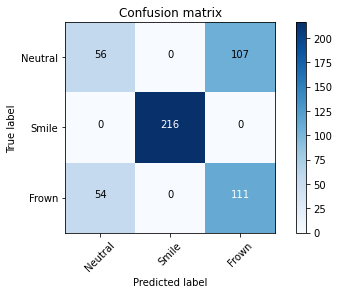

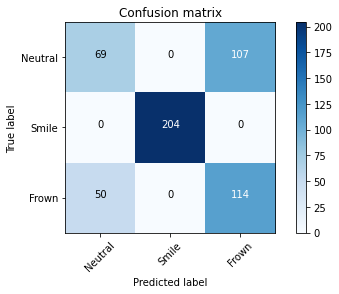

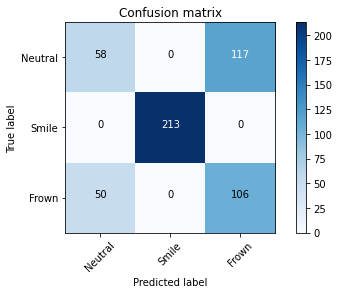

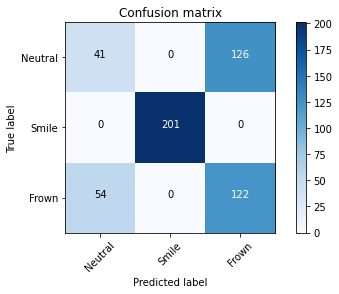

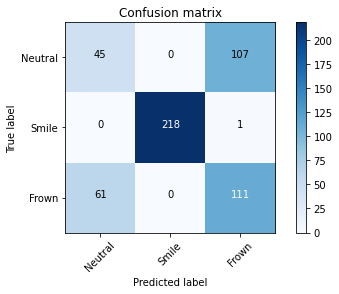

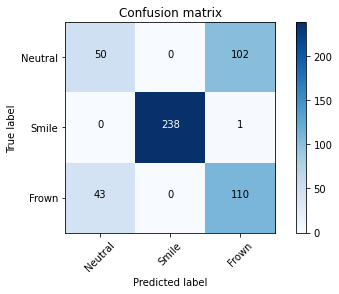

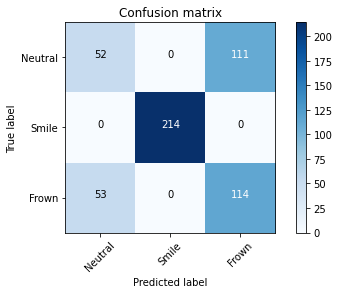

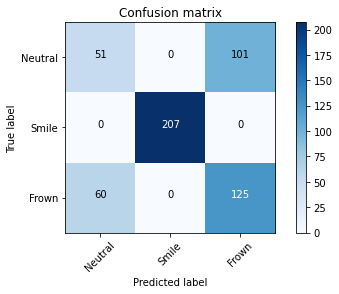

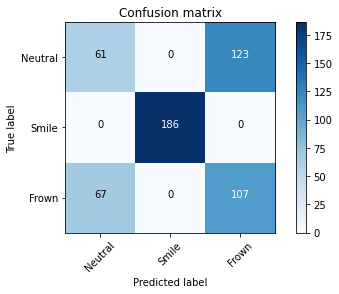

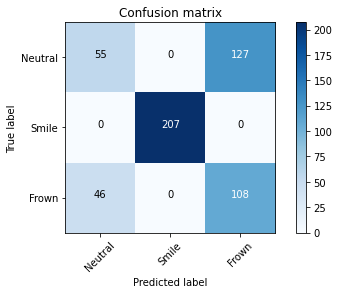

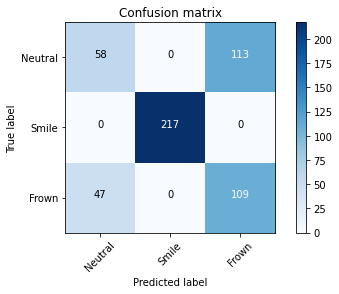

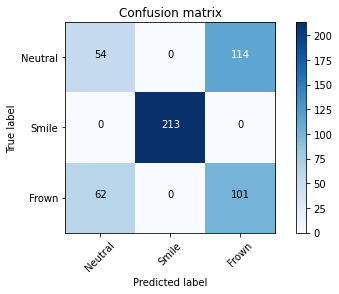

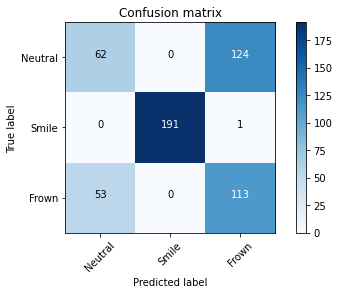

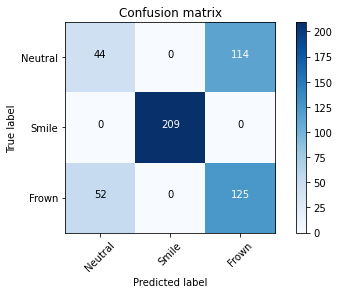

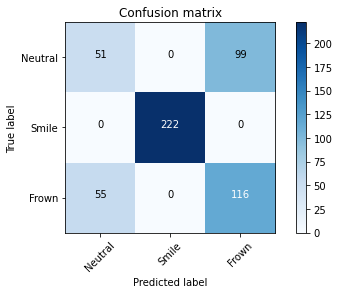

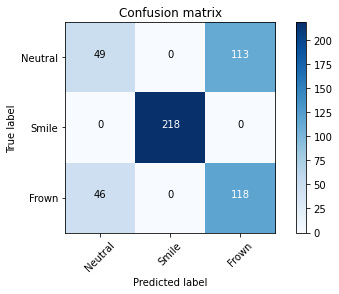

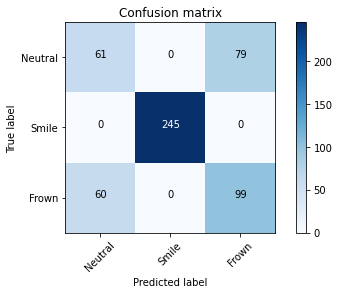

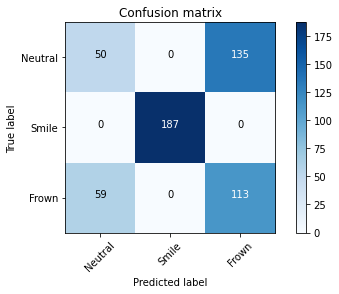

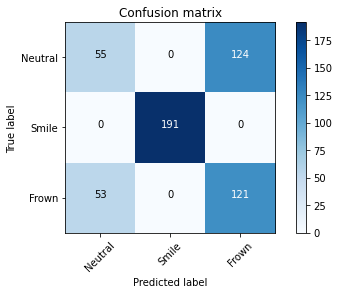

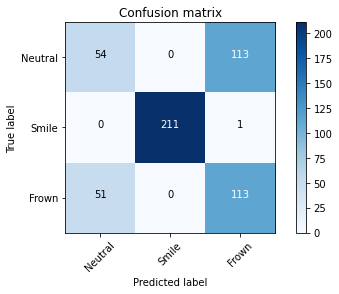

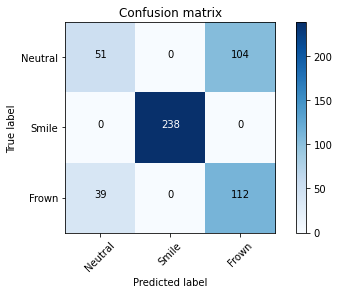

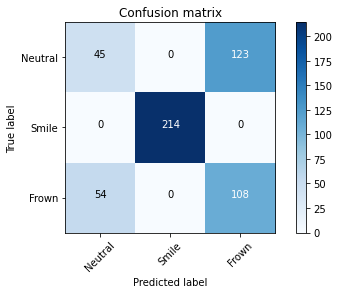

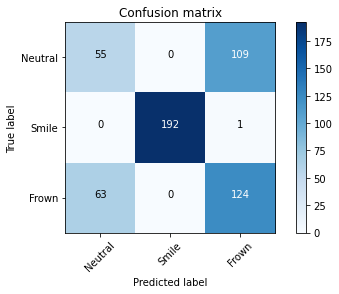

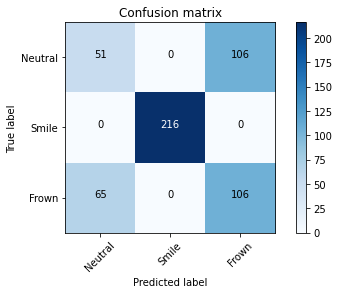

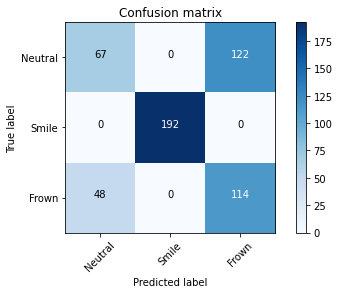

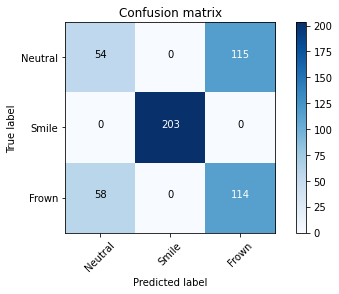

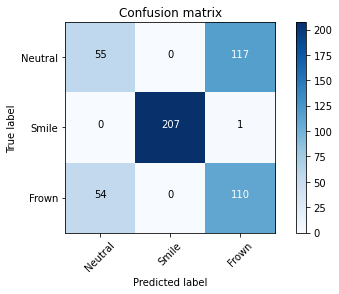

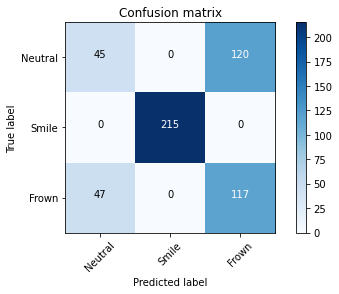

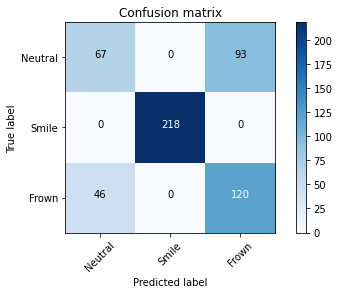

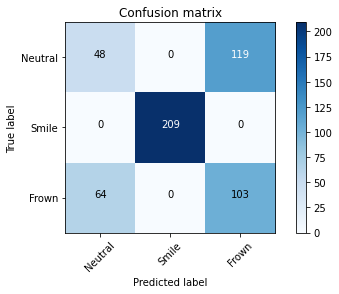

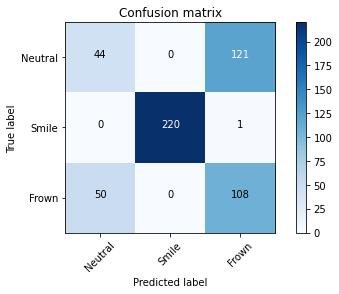

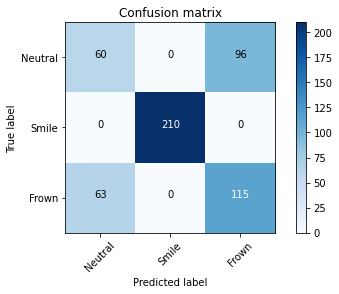

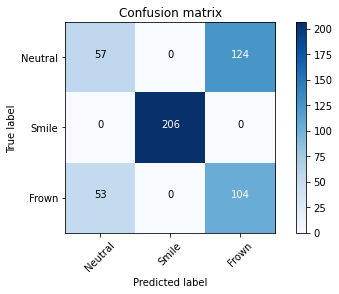

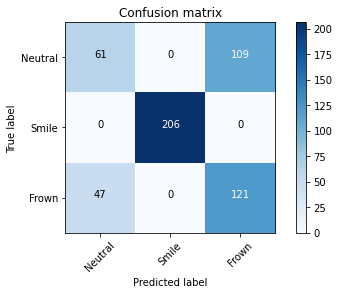

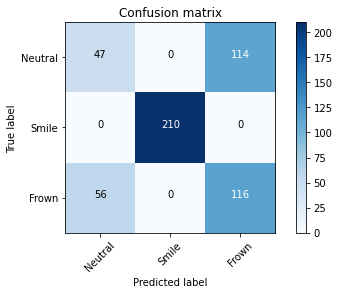

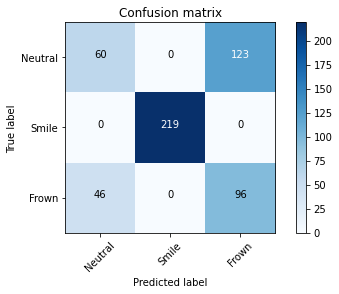

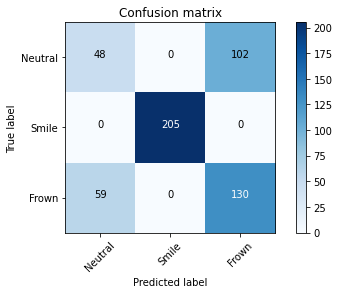

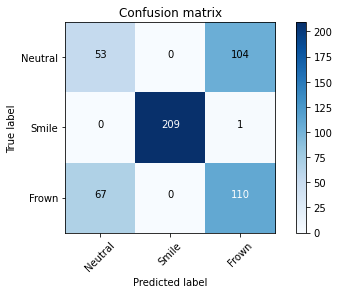

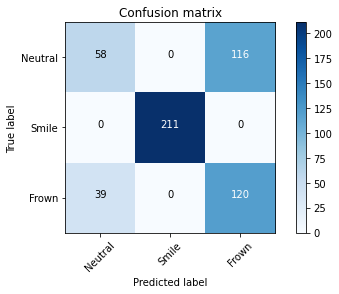

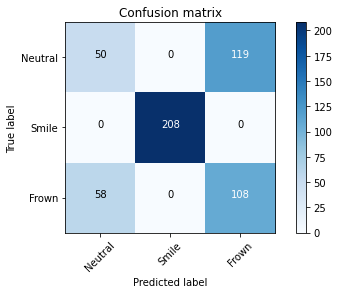

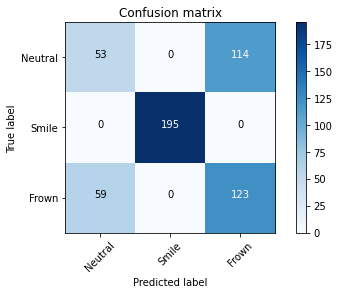

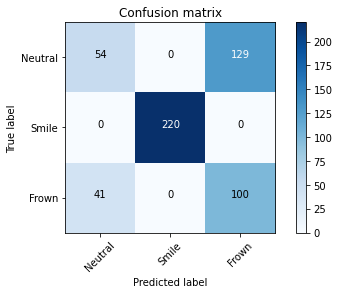

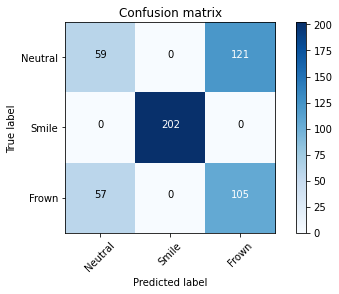

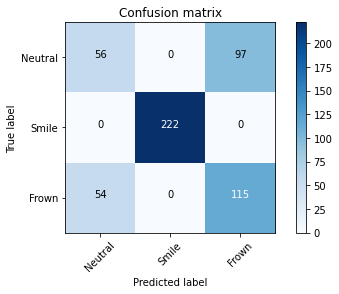

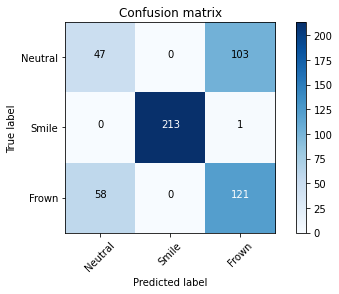

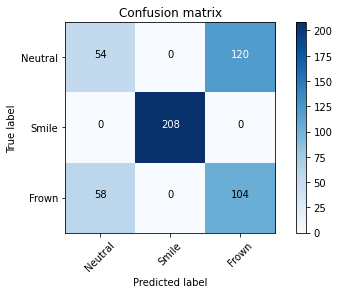

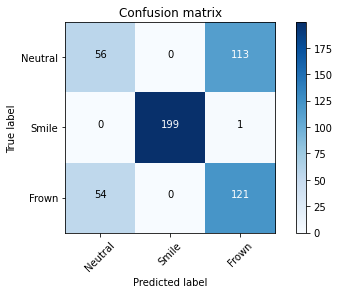

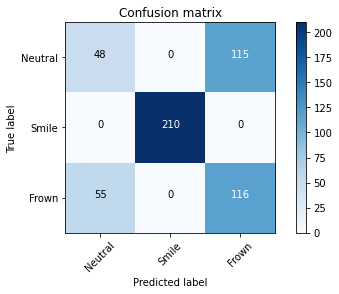

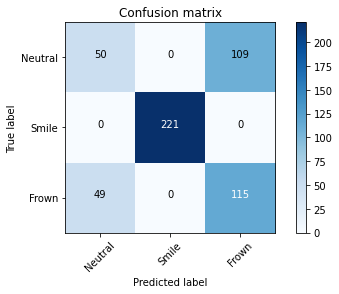

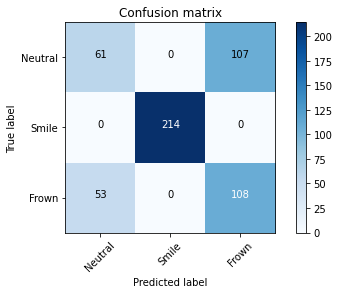

In [48]:
for train_index, test_index in kf.split(X):
    X_train, X_test = X[train_index], X[test_index] 
    y_train, y_test = y[train_index], y[test_index]

    for algo, model in gb.items():
        
        yhat = model.predict(X_test)
        print(algo, accuracy_score(y_test, yhat))
        # Compute confusion matrix
        cnf_matrix = confusion_matrix(y_test, yhat, labels=[0,1,2])
        np.set_printoptions(precision=2)

        print (classification_report(y_test, yhat))

        # Plot non-normalized confusion matrix
        plt.figure()
        plot_confusion_matrix(cnf_matrix, classes=['Neutral','Smile', 'Frown'],normalize= False,  title='Confusion matrix')


In [56]:
import pickle
with open('smile_neutral_frown_gb_reduced_points.pkl', 'wb') as f:
    pickle.dump(gb['gb'], f)

In [57]:
with open('smile_neutral_frown_gb_reduced_points.pkl', 'rb') as f:
    model = pickle.load(f)

In [54]:
import mediapipe

faceModule = mediapipe.solutions.face_mesh
with faceModule.FaceMesh(min_detection_confidence=0.5, min_tracking_confidence=0.5) as face:
    print(faceModule.FACEMESH_CONTOURS)


frozenset({(178, 87), (181, 84), (82, 13), (283, 282), (136, 172), (381, 382), (105, 66), (311, 310), (70, 63), (300, 293), (87, 14), (39, 37), (382, 362), (145, 153), (160, 159), (251, 389), (282, 295), (159, 158), (296, 336), (334, 296), (148, 176), (80, 81), (144, 145), (67, 109), (52, 65), (390, 373), (263, 249), (153, 154), (46, 53), (374, 380), (246, 161), (310, 415), (276, 283), (267, 269), (387, 386), (61, 146), (317, 402), (78, 191), (380, 381), (377, 152), (191, 80), (249, 390), (466, 388), (158, 157), (293, 334), (375, 291), (66, 107), (93, 234), (37, 0), (163, 144), (400, 377), (84, 17), (314, 405), (13, 312), (373, 374), (270, 409), (365, 379), (157, 173), (312, 311), (318, 324), (378, 400), (324, 308), (332, 284), (356, 454), (63, 105), (21, 54), (384, 398), (162, 21), (288, 397), (173, 133), (263, 466), (386, 385), (33, 7), (61, 185), (161, 160), (132, 93), (103, 67), (53, 52), (78, 95), (91, 181), (321, 375), (454, 323), (0, 267), (323, 361), (176, 149), (155, 133), (40

In [59]:
import cv2
import mediapipe
import numpy as np
import csv
cap = cv2.VideoCapture(0)

# facemesh

faceModule = mediapipe.solutions.face_mesh
mp_drawing = mediapipe.solutions.drawing_utils # Drawing helpers

circleDrawingSpec = mp_drawing.DrawingSpec(thickness=1, circle_radius=1, color=(0,255,0))
lineDrawingSpec = mp_drawing.DrawingSpec(thickness=1, color=(0,255,0))
 
with faceModule.FaceMesh(min_detection_confidence=0.5, min_tracking_confidence=0.5) as face:
    
    while cap.isOpened():
        ret, frame = cap.read()
        
        # Recolor Feed
        image = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
        image.flags.writeable = False        
        
        # Make Detections
        results = face.process(image)
        #print(results.face_landmarks)
        
        # face_landmarks, pose_landmarks, left_hand_landmarks, right_hand_landmarks
        
        # Recolor image back to BGR for rendering
        image.flags.writeable = True   
        image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)
        
        # 1. Draw face landmarks
        if results.multi_face_landmarks != None:
            for faceLandmarks in results.multi_face_landmarks:
                point_values = []
                showlmks = []
                for i in range(0, 468):
                    
                    if (i in imp_face_pts):
                        pt1 = faceLandmarks.landmark[i]
                        showlmks.append(pt1)

                        point_values.append(pt1.x)
                        point_values.append(pt1.y)
                        point_values.append(pt1.z)
                
                
                 # Make Detections
                X = pd.DataFrame([point_values])
                
                body_language_class = model.predict(X)[0]
                print(body_language_class)
                
                mp_drawing.draw_landmarks(image, faceLandmarks, faceModule.FACEMESH_CONTOURS, circleDrawingSpec, lineDrawingSpec)

                # Display Class
                cv2.putText(image, 'CLASS'
                            , (95,12), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 0), 1, cv2.LINE_AA)
                cv2.putText(image, str(body_language_class)
                            , (90,40), cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2, cv2.LINE_AA)
            
        cv2.imshow('Raw Webcam Feed', image)

        if cv2.waitKey(10) & 0xFF == ord('q'):
            break

cap.release()
cv2.destroyAllWindows()

ValueError: operands could not be broadcast together with shapes (1,573) (585,) (1,573) 